#####################################################
## title: SOC 128D PS1
## author: Andrew Yu
## purpose: to try out R
## date: 28 June 2023
#####################################################

# you can start coding below

In [ ]:
vec = [i for i in range(1, 21)]
vec

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
new_vec = [num * 2 for num in vec]
new_vec

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]

2. Let’s put the two vectors together in a dataframe!

In [ ]:
#Packages for working with data
# Modin is a drop-in replacement for pandas, with multiple advantages
!pip install "modin[dask]"
import modin.pandas as pd

df = pd.DataFrame({"x":vec, "y":new_vec})
df = df.set_index(["x"])
df

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.6 MB/s eta 0:00:00


To remove this warning, run the following python code before doing dataframe operations:

    from distributed import Client

    client = Client()

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:45737
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40537'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45883'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:37931', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37931
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:53182
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:34921', name: 1, s

,y
x,
1,2
2,4
3,6
4,8
5,10
6,12
7,14
8,16
9,18


3. Now, name the two columns in the dataframe x and y, and create a plot using the data!

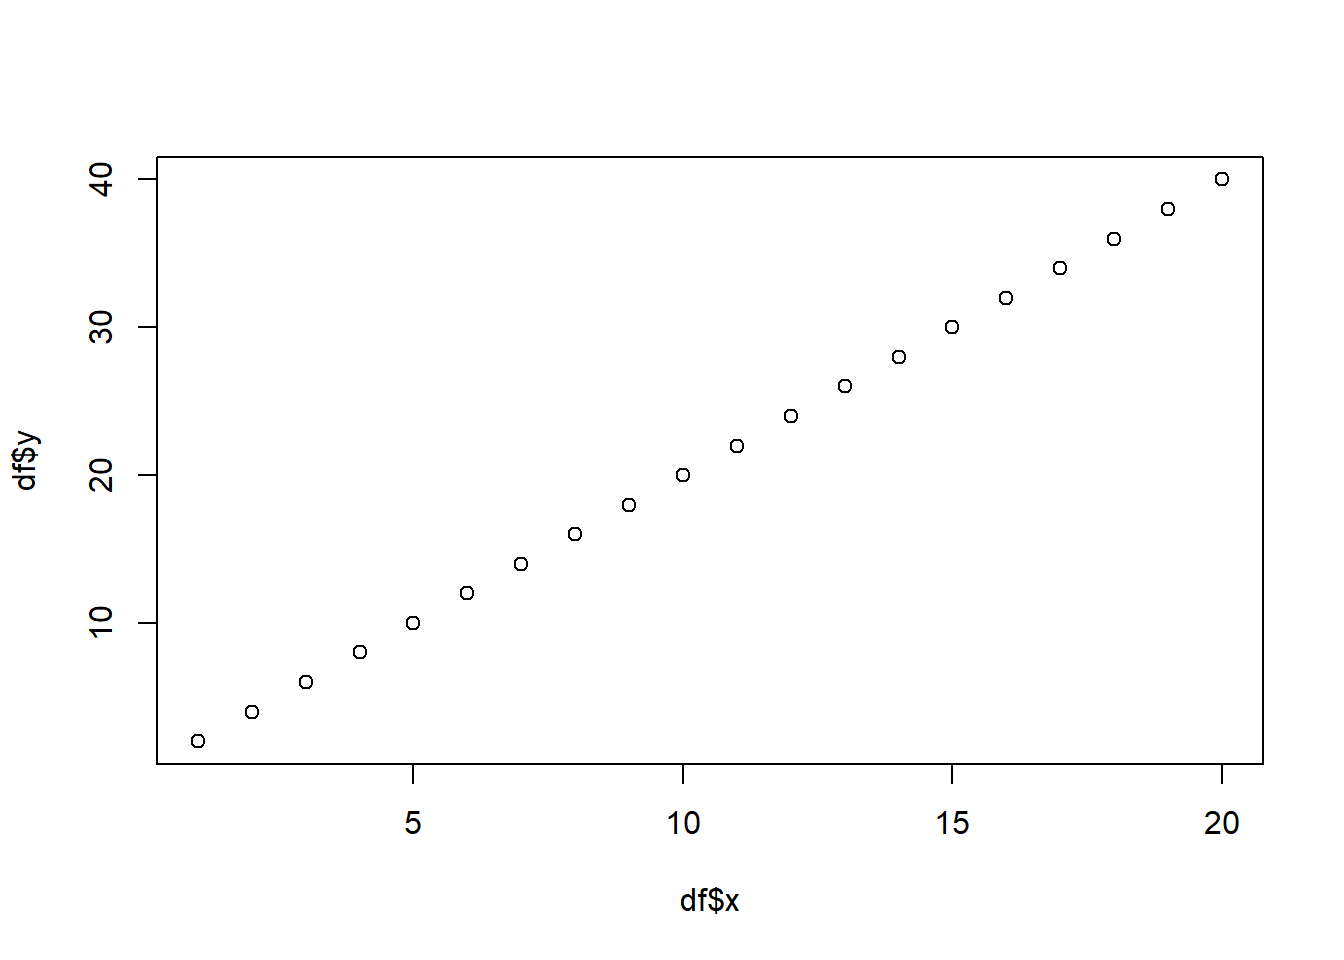

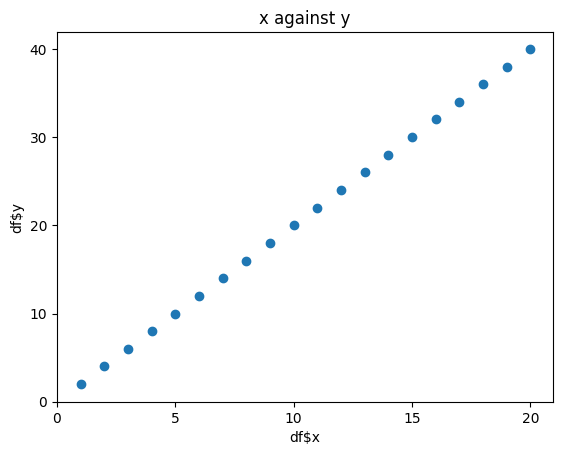

In [ ]:
# Matplotlib to plot data
import matplotlib.pyplot as mplt
import numpy as np

mplt.scatter(df.index, df.values)
mplt.xlabel("df$x")
mplt.ylabel("df$y")
mplt.xticks(ticks=np.arange(0, 21, step=5))
mplt.yticks(ticks=np.arange(0, 41, step=10))
mplt.title("x against y")
mplt.show()

In [ ]:
FOLDERNAME = "Stanford Summer Session/SOC 128D/data"
data_df = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/guardian_katrina.csv")
temps_df = data_df[:-1]
temps_df["Year"] = temps_df["Year"].astype(int)
avg_temp = data_df.iloc[len(data_df) - 1]["Annual Average Temperature (F)"]
# temps_df["Year"] = pd.to_datetime(temps_df["Year"], format="%Y")
print(avg_temp)
print(temps_df)
print(temps_df.info())

Data types of partitions are different! Please refer to the troubleshooting section of the Modin documentation to fix this issue.


52.2
     Year  Annual Average Temperature (F)
0    1875                            52.5
1    1876                            51.5
2    1877                            52.0
3    1878                            52.5
4    1879                            52.7
..    ...                             ...
143  2018                            56.2
144  2019                            53.6
145  2020                            55.7
146  2021                            56.3
147  2022                            55.9

[148 rows x 2 columns]
<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            148 non-null    int64  
 1   Annual Average Temperature (F)  148 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.4 KB
None


4. Read the temperature data from canvas (temps.csv) into your R session using the read_csv() function from the readr package. Can you produce a plot like the one from section 1.5? Can you make the plot more interesting in any ways?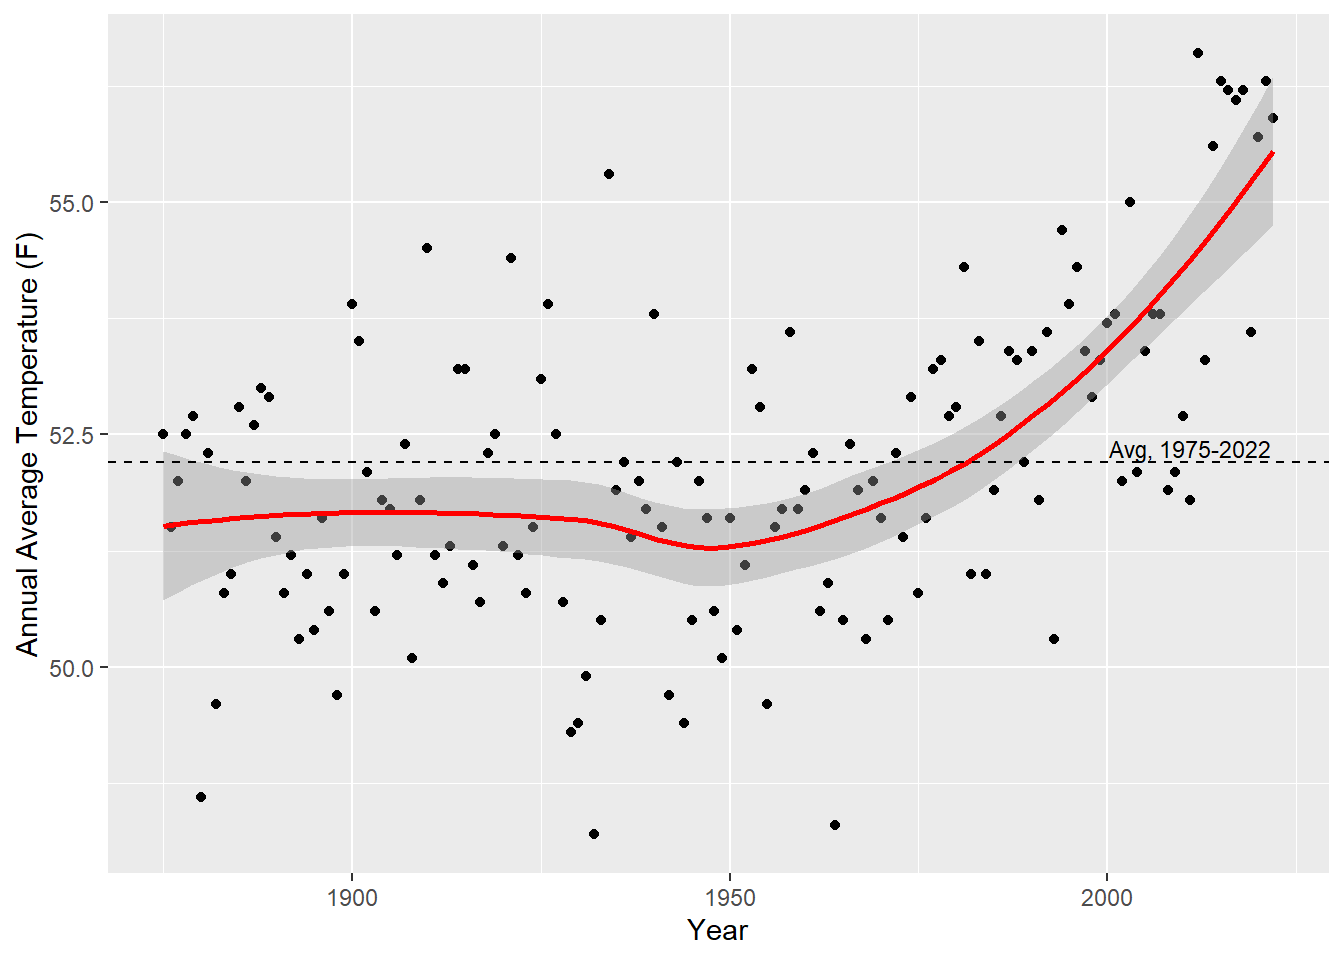

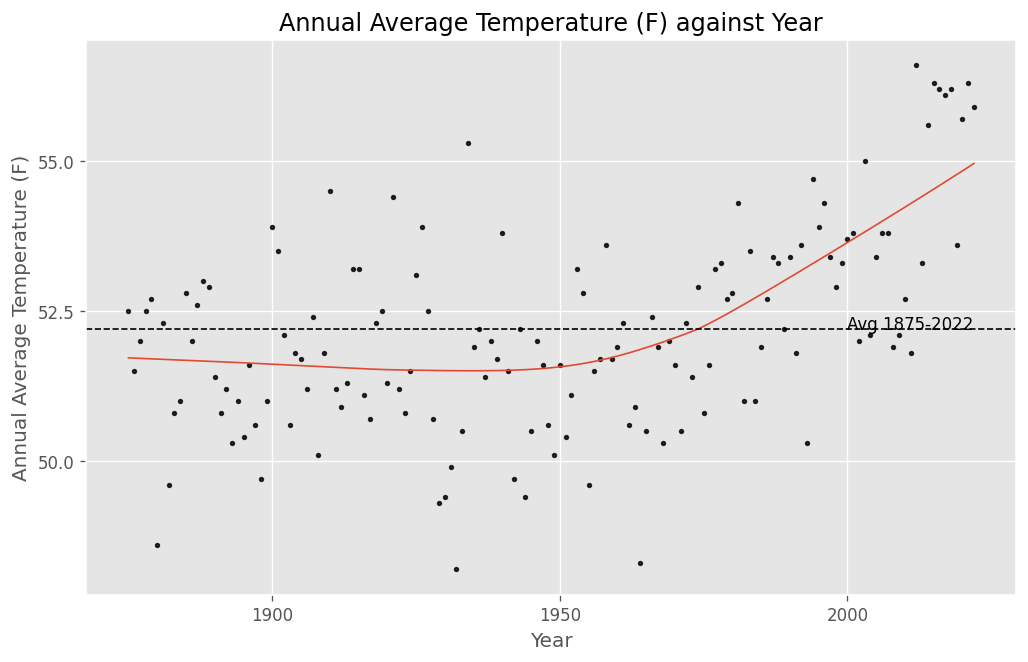

In [ ]:
import seaborn as sb
mplt.style.use("ggplot")

# Plot with lowess (curved) line which cannot have confidence interval
mplt.figure(figsize=(10,6), dpi=120)
sb.regplot(x=temps_df["Year"], y=temps_df["Annual Average Temperature (F)"], lowess=True, scatter_kws={"color": "black", "s":5}, line_kws={"linewidth": 1})
mplt.axhline(y=avg_temp, linestyle='--', color='black', linewidth=1)
mplt.text(2000, avg_temp, "Avg 1875-2022", color='black')
mplt.xticks(ticks=np.arange(1900, 2023, step=50))
mplt.yticks(ticks=np.arange(50, 56, step=2.5))
mplt.title("Annual Average Temperature (F) against Year")
mplt.show()

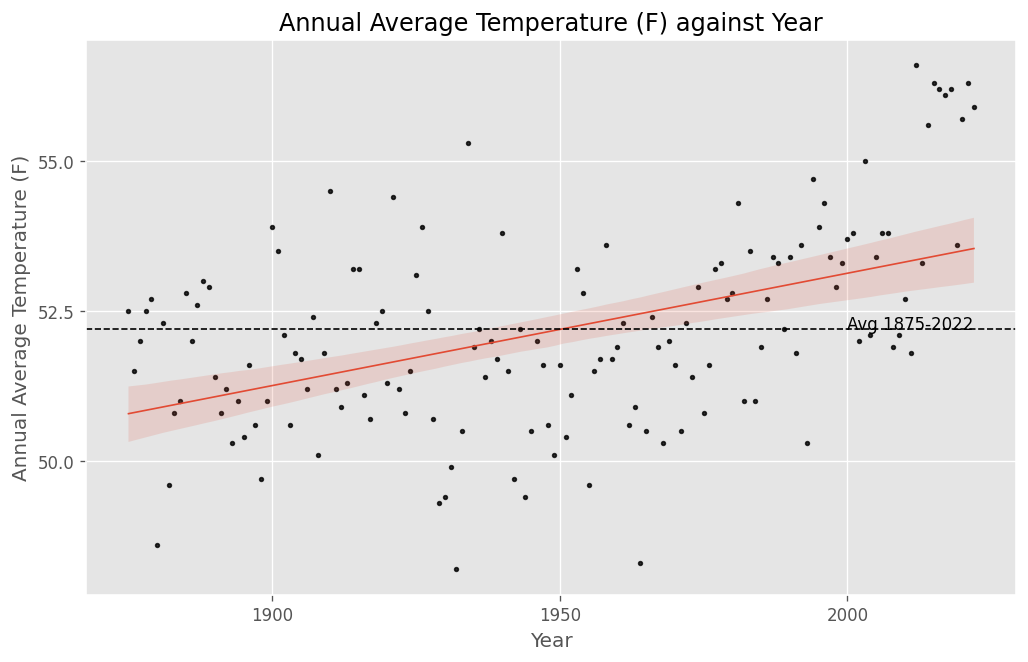

In [ ]:
# Plot with straight regression line with confidence interval
mplt.figure(figsize=(10,6), dpi=120)
sb.regplot(x=temps_df["Year"], y=temps_df["Annual Average Temperature (F)"], ci=95, scatter_kws={"color": "black", "s":5}, line_kws={"linewidth": 1})
mplt.axhline(y=avg_temp, linestyle='--', color='black', linewidth=1)
mplt.text(2000, avg_temp, "Avg 1875-2022", color='black')
mplt.xticks(ticks=np.arange(1900, 2023, step=50))
mplt.yticks(ticks=np.arange(50, 56, step=2.5))
mplt.title("Annual Average Temperature (F) against Year")
mplt.show()

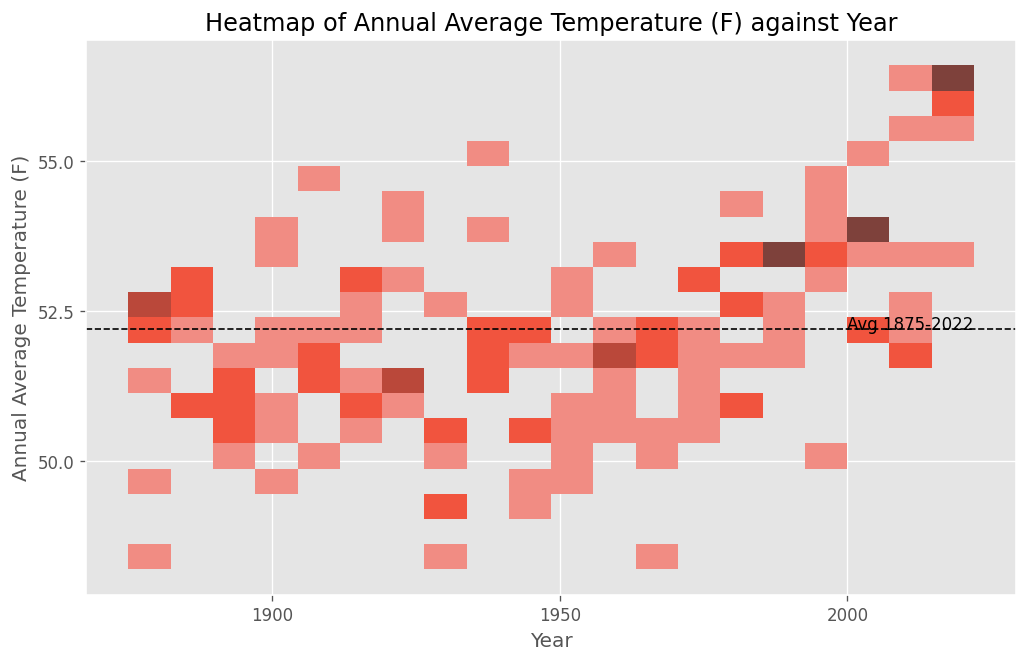

In [ ]:
mplt.figure(figsize=(10,6), dpi=120)
sb.histplot(x=temps_df["Year"], y=temps_df["Annual Average Temperature (F)"], bins=20)
mplt.axhline(y=avg_temp, linestyle='--', color='black', linewidth=1)
mplt.text(2000, avg_temp, "Avg 1875-2022", color='black')
mplt.xticks(ticks=np.arange(1900, 2023, step=50))
mplt.yticks(ticks=np.arange(50, 56, step=2.5))
mplt.title("Heatmap of Annual Average Temperature (F) against Year")
mplt.show()

One way I can think of, to make this more interesting is to portray the density of temperatures across the years through a heatmap.

The darker the shade of the rectangle, the greater the cluster of temperatures within that period (meaning small range, small deviations of temperatures).

This could allude to similar levels of efforts or lack thereof within that period, to reduce the annual average temperature even with the data of the past year.

As the heatmap evidently depicts, the majority of temperatures have been below the average temperature, only starting to trend up around 1975. Towards the top-right of the graph (recent years), the rectangle is of the darkest shade and well above the average temperature horizontal line. This informs us that  our conservation efforts may still not be adequate.

5. Discuss the importance of your plot using some frameworks for understanding climate change (e.g. environmental justice). The week 1 readings may be helpful for this question.

The plot shows that more recently, annual average temperatures are trending upwards, far from the overall average across 1875-2022. This makes sense, as humanity is advancing at unprecendented rates in terms of technology and population, and thus there would inevitably be adverse effects on the environment.

Global warming/heating affects everyone by and large, and thus is not a narrowly class phenomena. As everyone is vested in survivability, it is therefore not a problem solely of the more vulnerable classes. However, the more vulnerable classes most certainly have less ways to cope with the rising temperatures, and thus as a result may suffer more.

Additionally, these recent temperatures on the plot are also clustered, meaning little/no difference year on year.

It is critical for us to increase our conservation efforts at at least the rate of our advancement that is contributing to climate change. We must also be able to detect when people of power are using climate change as an excuse to advance their own agenda, and call them out for it publicly if possible.